# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
final_combined_df = combined_df.loc[combined_df['Timepoint']==0]
final_df = final_combined_df[["Mouse ID","Timepoint","Tumor Volume (mm3)",
                       "Metastatic Sites", "Drug Regimen", "Sex", "Age_months"
                      ,"Weight (g)"]]

# Display the data table for preview
final_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
10,s185,0,45.0,0,Capomulin,Female,3,17
20,x401,0,45.0,0,Capomulin,Female,16,15
30,m601,0,45.0,0,Capomulin,Male,22,17
40,g791,0,45.0,0,Ramicane,Male,11,16


In [47]:
# Checking the number of mice.
count = final_df["Mouse ID"].nunique()
count

249

In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = final_df[final_df["Mouse ID"].duplicated()==True]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
909,g989,0,45.0,0,Propriva,Female,21,26


In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_g989_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
final_g989_df = combined_g989_df.loc[combined_g989_df['Mouse ID']=='g989']
final_g989_df=final_g989_df[["Mouse ID","Timepoint","Tumor Volume (mm3)",
                       "Metastatic Sites", "Drug Regimen", "Sex", "Age_months"
                      ,"Weight (g)"]]
final_g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
deduped_df = final_df.drop_duplicates(subset=["Mouse ID"])
deduped_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
10,s185,0,45.0,0,Capomulin,Female,3,17
20,x401,0,45.0,0,Capomulin,Female,16,15
30,m601,0,45.0,0,Capomulin,Male,22,17
40,g791,0,45.0,0,Ramicane,Male,11,16


In [51]:
# Checking the number of mice in the clean DataFrame.
deduped_count=deduped_df["Mouse ID"].count()
deduped_count

249

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = combined_df.groupby(['Drug Regimen'])

mean = summary_df['Tumor Volume (mm3)'].mean()
median = summary_df['Tumor Volume (mm3)'].median()
variance = summary_df['Tumor Volume (mm3)'].var()
stdv = summary_df['Tumor Volume (mm3)'].std()
sem = summary_df['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume':median,
                        'Tumor Volume Variance':variance, 'Tumor Volume Std. Dev.':stdv,
                        'Tumor Volume Std. Err.':sem})

tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summaryagg_method = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summaryagg_method 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

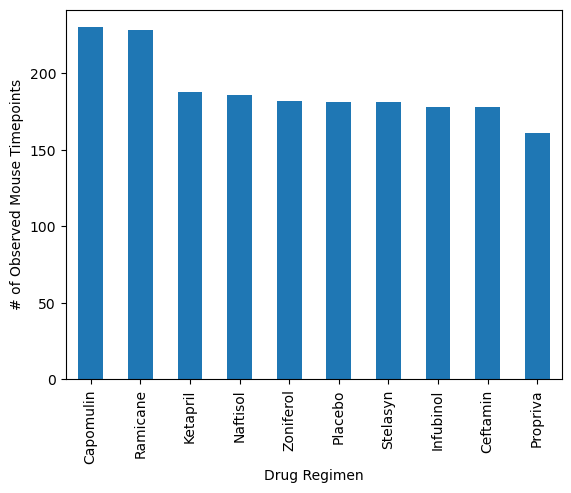

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_count = combined_df["Drug Regimen"].value_counts()

mouse_count.plot(kind = "bar")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


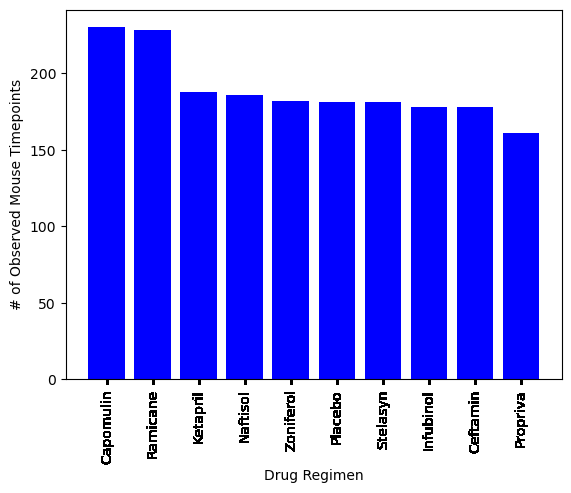

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

labels = mouse_count
data = mouse_count.index.values


plt.bar(data, labels, color='b')
plt.xticks(combined_df["Drug Regimen"], rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


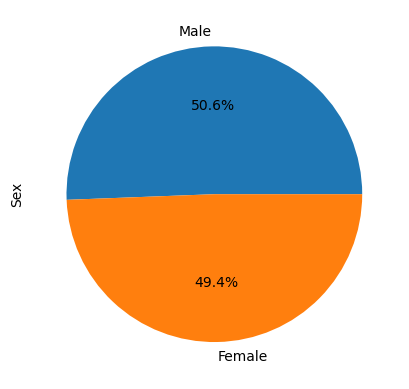

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = combined_df["Sex"].value_counts()

gender.plot(kind = "pie", autopct="%1.1f%%")

plt.ylabel("Sex")

plt.show()


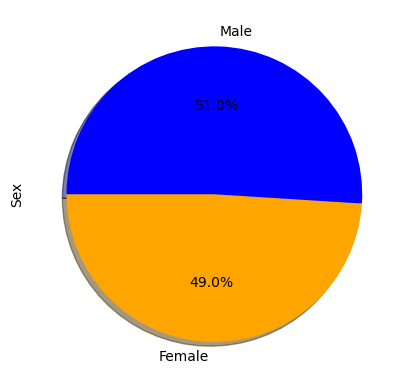

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
sizes = [49, 51]

colors = ["orange", "blue"]
plt.ylabel("Sex")

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = combined_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_timepoint_df = pd.merge(greatest_timepoint_df, combined_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Filter data for the specified treatments
tumor_timepoint_filtered = tumor_timepoint_df[tumor_timepoint_df['Drug Regimen'].isin(treatment)]
tumor_timepoint_filtered.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# add subset 
# Determine outliers using upper and lower bounds
# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatment_list:
    final_tumor_vol = tumor_timepoint_df.loc[tumor_timepoint_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)  

    quartiles = final_tumor_vol.quantile([.25,.5,.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 

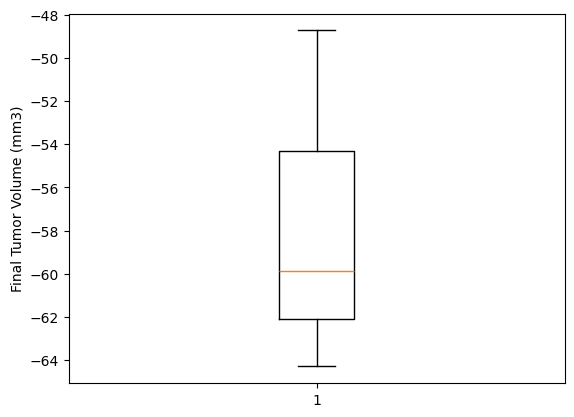

In [79]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(-quartiles)
plt.show()

## Line and Scatter Plots

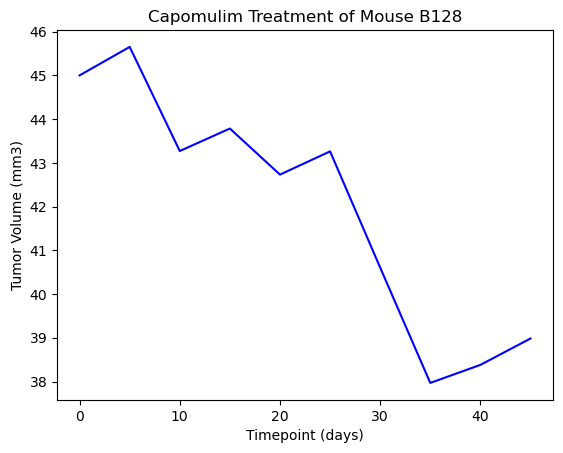

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_b128 = combined_df.loc[combined_df['Mouse ID'] == 'b128']

plt.plot(mouse_b128['Timepoint'], mouse_b128['Tumor Volume (mm3)'], color="blue")

plt.title("Capomulim Treatment of Mouse B128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

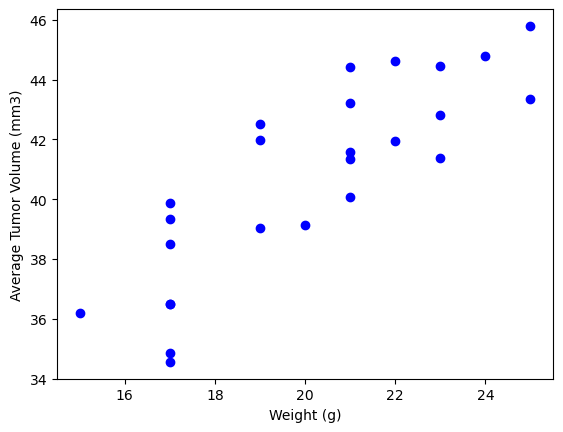

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]

capomulin_avgs = capomulin.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

plt.scatter(capomulin_avgs['Weight (g)'],capomulin_avgs['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="blue")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


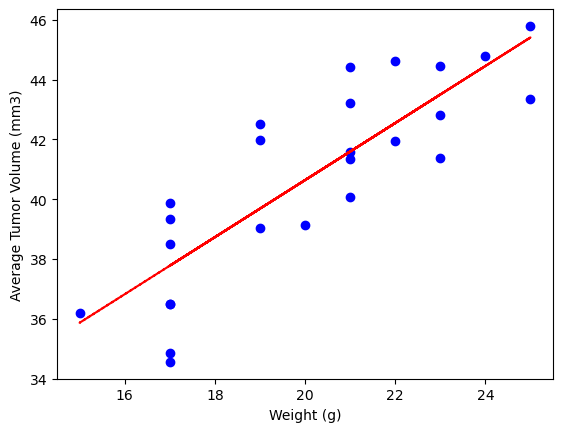

In [82]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]

capomulin_avgs = capomulin.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

plt.scatter(capomulin_avgs['Weight (g)'],capomulin_avgs['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="blue")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

correlation = st.pearsonr(capomulin_avgs['Weight (g)'],capomulin_avgs['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(capomulin_avgs['Weight (g)'],capomulin_avgs['Tumor Volume (mm3)'])
pe_fit = pe_slope * capomulin_avgs['Weight (g)'] + pe_int

plt.plot(capomulin_avgs['Weight (g)'],pe_fit,"--", color = "red")

plt.show()